In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(338,500)]
i =0
salt = np.zeros((162,62))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/scratch/group/ihesp/user/xiliangdiao/ihespdata/ocn330-500/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[250:344,1100:1300]
        #latt = latt[250:344,1100:1300]
        plotvar = plotvar[0,200:400,700:1000]
        plotvar[plotvar == -1000.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=0)
        aveplot = np.nanmean(aveplot,axis=0)
        #aveplot = plotvar.mean(axis=1)
        #aveplot = aveplot.mean(axis=1)
        salt[i] = aveplot
        
        i = i + 1
#********************************************************************

In [4]:
temp = np.zeros((162,62))
i = 0
for yy in years:
    for mm in months:
        data=nc.Dataset('/scratch/group/ihesp/user/xiliangdiao/ihespdata/ocn330-500/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        plotvar = data.variables['TEMP'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[250:344,1100:1300]
        #latt = latt[250:344,1100:1300]
        plotvar = plotvar[0,200:400,700:1000]
        plotvar[plotvar == -1.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=0)
        aveplot = np.nanmean(aveplot,axis=0)
        #aveplot = plotvar.mean(axis=1)
        #aveplot = aveplot.mean(axis=1)
        temp[i] = aveplot
        
        i = i + 1
#********************************************************************

In [5]:
import gsw

In [6]:
# Calculates Conservative Temperature of seawater from potential temperature
consertmp = gsw.CT_from_pt(salt,temp)

In [7]:
#Calculates potential density anomaly with reference pressure of 0 dbar
densityanomaly = gsw.sigma0(salt,consertmp)

In [8]:
np.save(file="250density0.npy", arr=densityanomaly)

In [9]:
mid= np.load(file="250density500.npy")

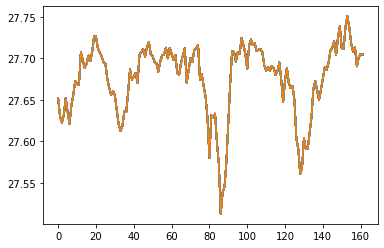

In [11]:
plt.plot(densityanomaly)